<a href="https://colab.research.google.com/github/Shaheen614/Summer-of-ML/blob/REMOTE/Copy_of_WEEK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK-2 Graded Assignment: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recommend watching the video lectures and work out ungraded assisgnment ,completing the review questions for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.

In [15]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

Iris species of a flower is one of the most popular datasets for machine learning. This dataset is primarily for classification, but here we will use same dataset with some changes so that we can use it for Linear Regression. Let's load the dataset first.

In [16]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

It includes three iris species named as 'setosa' , 'versicolor', 'virginica' with  some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id,
Sepal Length Cm,
Sepal Width Cm,,
Petal Length Cm,
Petal Width Cm,
Species. Let's see some of the first rows of the datasets after loading it from sklearn.

In [18]:
iris_data =pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"]=iris.target
iris_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We can now rename column name to make it more standard for ease of coding and readability.

In [19]:
iris_data.rename(columns={'sepal length (cm)':'sepal_length',
                          'sepal width (cm)':'sepal_width',
                          'petal length (cm)':'petal_length',
                          'petal width (cm)':'petal_width'},inplace=True)

Add a new column named "species" having value {if target == 0 : 'setosa' ,
if target ==1 : 'versicolor',
if target == 2 : 'virginica' }

In [20]:
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_data['species'] = iris_data['target'].map(species_map)


we will now select "versicolor" to predict its "petal_width" using "petal_length " as one of the parameter.So your next task is to make a new DataFrame named "data" having only rows whose species values are 'versicolor'.


In [21]:
data = iris_data[iris_data['species'] == 'versicolor']


Now we are droping  all the columns except petal_length and petal_width

In [22]:
data = data[["petal_length", "petal_width"]]


Now write code to print the shape of DataFrame named as data.

In [23]:
print(data.shape)

(50, 2)


Now  plot the Dataframe named data having x axis as 'petal_length', y axis as 'petal_width' and kind='scatter'

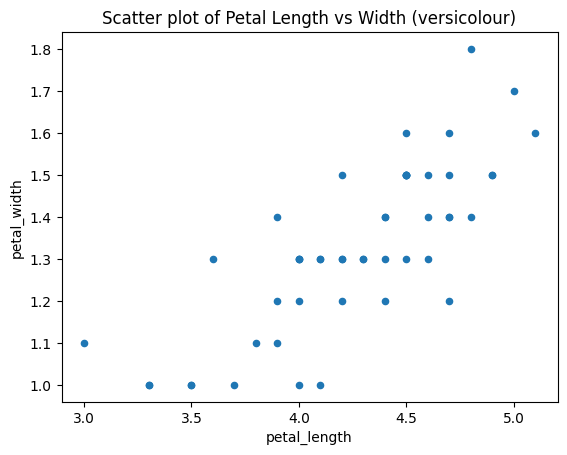

In [24]:
import matplotlib.pyplot as plt
data.plot(kind = 'scatter' , x = "petal_length" , y = "petal_width")
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Scatter plot of Petal Length vs Width (versicolour)')
plt.show()

Now let's start with Linear Regression

We will now split the dataset into training and test datasets into (X_train,Y_train) and (X_test,Y_test)

In [31]:
from sklearn.model_selection import train_test_split

X = data["petal_length"].values.reshape(-1, 1)
Y = data["petal_width"].values


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



Now let's plot the training  datasets of  kind scatter with x axis as X_train and y axis as Y_train.

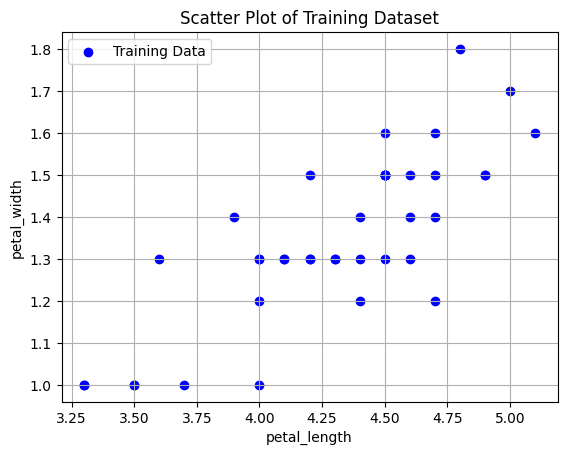

In [33]:
import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Scatter Plot of Training Dataset')
plt.legend()
plt.grid(True)
plt.show()


Now let's plot the test datasets of kind scatter with x axis as X_test and y axis as Y_test

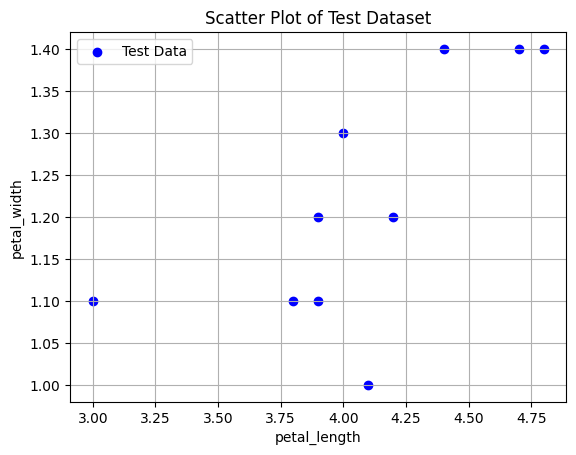

In [34]:
import matplotlib.pyplot as plt

plt.scatter(X_test, Y_test, color='blue', label='Test Data')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Scatter Plot of Test Dataset')
plt.legend()
plt.grid(True)
plt.show()



Now write the code for LinearRegession using any preffered method.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.01816337187264257
R-squared: 0.07329735343660293


Now print the Intercept and Coefficient.

In [36]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Intercept: -0.1765503156331225
Coefficient: 0.35518009654660226


Now we can overlay the predicted line and test data points to see where the predicted point lies.

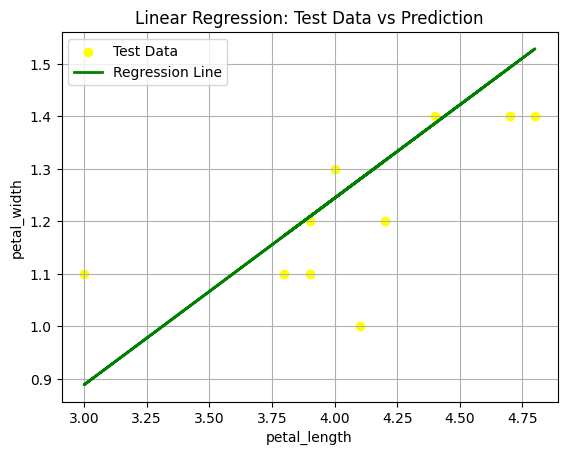

In [38]:
Y_pred = model.predict(X_test)


import matplotlib.pyplot as plt

plt.scatter(X_test, Y_test, color='yellow', label='Test Data')
plt.plot(X_test, Y_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Linear Regression: Test Data vs Prediction')
plt.legend()
plt.grid(True)
plt.show()


This is end of assisgnment , but for futhur reading you can search articles on
Lasso Regression, Multivariate Regression , ElasticNet regression, Ridge Regression, Stepwise Regression.